# Test the Bayesian isochrone code

In [1]:
import numpy as np
import pandas as pd

import os, sys, tqdm, copy

import tqdm
import tqdm.notebook

import matplotlib.pyplot as plt
import matplotlib

style = [
    # 'seaborn-ticks',
    {
        'figure.dpi': 300,
        'font.size': 12,
        'image.cmap': 'inferno',
        'font.family': 'serif',
        'font.serif': ['Times', 'Times New Roman'] + plt.rcParams['font.serif'],
        'xtick.top': True,
        'xtick.direction': 'in',
        'ytick.right': True,
        'ytick.direction': 'in',
        'mathtext.fontset': 'cm'
        }]
plt.style.use(style)

# import scipy.io

In [2]:
# github_dir = '/home/dingshandeng/github/ysoisochrone/'
github_dir = '/Users/dingshandeng/github/ysoisochrone/'

os.chdir(os.path.join(github_dir, 'tests'))
sys.path.append(os.path.join(github_dir))

# import ysoisochrone.utils as utils
# import ysoisochrone.bayesian as bayesian
# import ysoisochrone.plotting as plotting
import ysoisochrone

### Readin the data files for the dataset

In [3]:
# AP_data_dir = '/home/dingshandeng/github/DataCalibration/AGE-PRO-analysis/Data_analysis_n_General_Plots'
agepro_dir = '/Users/dingshandeng/github/DataCalibration/'
AP_data_dir = '/Users/dingshandeng/github/DataCalibration/AGE-PRO-analysis/Data_analysis_n_General_Plots'

df_AP_LP_st = pd.read_csv(AP_data_dir+'/data/Table_AGEPRO_Lupus_stellar_parameters.csv')

file_dir_Manara = os.path.join(agepro_dir, 'ManaraPPVII-data_and_others/')
agepro_alcala_data = pd.read_csv(os.path.join(file_dir_Manara, 'Alcala+2017_table_A2_stellar_properties - Sheet2.csv'))

teff_err = np.zeros(len(agepro_alcala_data))
luminosity_star_err = np.zeros(len(agepro_alcala_data))
mstar_err = np.zeros(len(agepro_alcala_data))
for ii in agepro_alcala_data.index:
    luminosity_star_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Lstar (err)[Lsun]'].split('(')[1][0:-1])
    teff_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Teff (err)[K]'].split('(')[1][0:-1])
    mstar_err[ii] = np.float64(agepro_alcala_data.loc[ii, 'Mstar(S00) (err)[Msun]'].split('(')[1][0:-1])

df_prop = copy.deepcopy(df_AP_LP_st)

# df_prop['Source'] = df_prop['Source']
df_prop['Teff[K]'] = df_prop['Teff_xs']
df_prop['Luminosity[Lsun]'] = df_prop['Lstar_xs_DR3']
df_prop['e_Teff[K]'] = teff_err
df_prop['e_Luminosity[Lsun]'] = luminosity_star_err
# print(df_prop.columns)

# For AGE-PRO UScous targets
toobright = [] # ['0']  
toofaint = [] # ['0']
median_age = 1.0 # Myrs	

# only select part of the data
# df_prop = df_prop.loc[:2]

# df_output = df_prop.loc[:, ['Source', 'Teff', 'e_Teff', 'Luminosity', 'e_Luminosity']]
# df_output.to_csv('./target_info.csv', index=False)

### Plot the HR for each isochrones

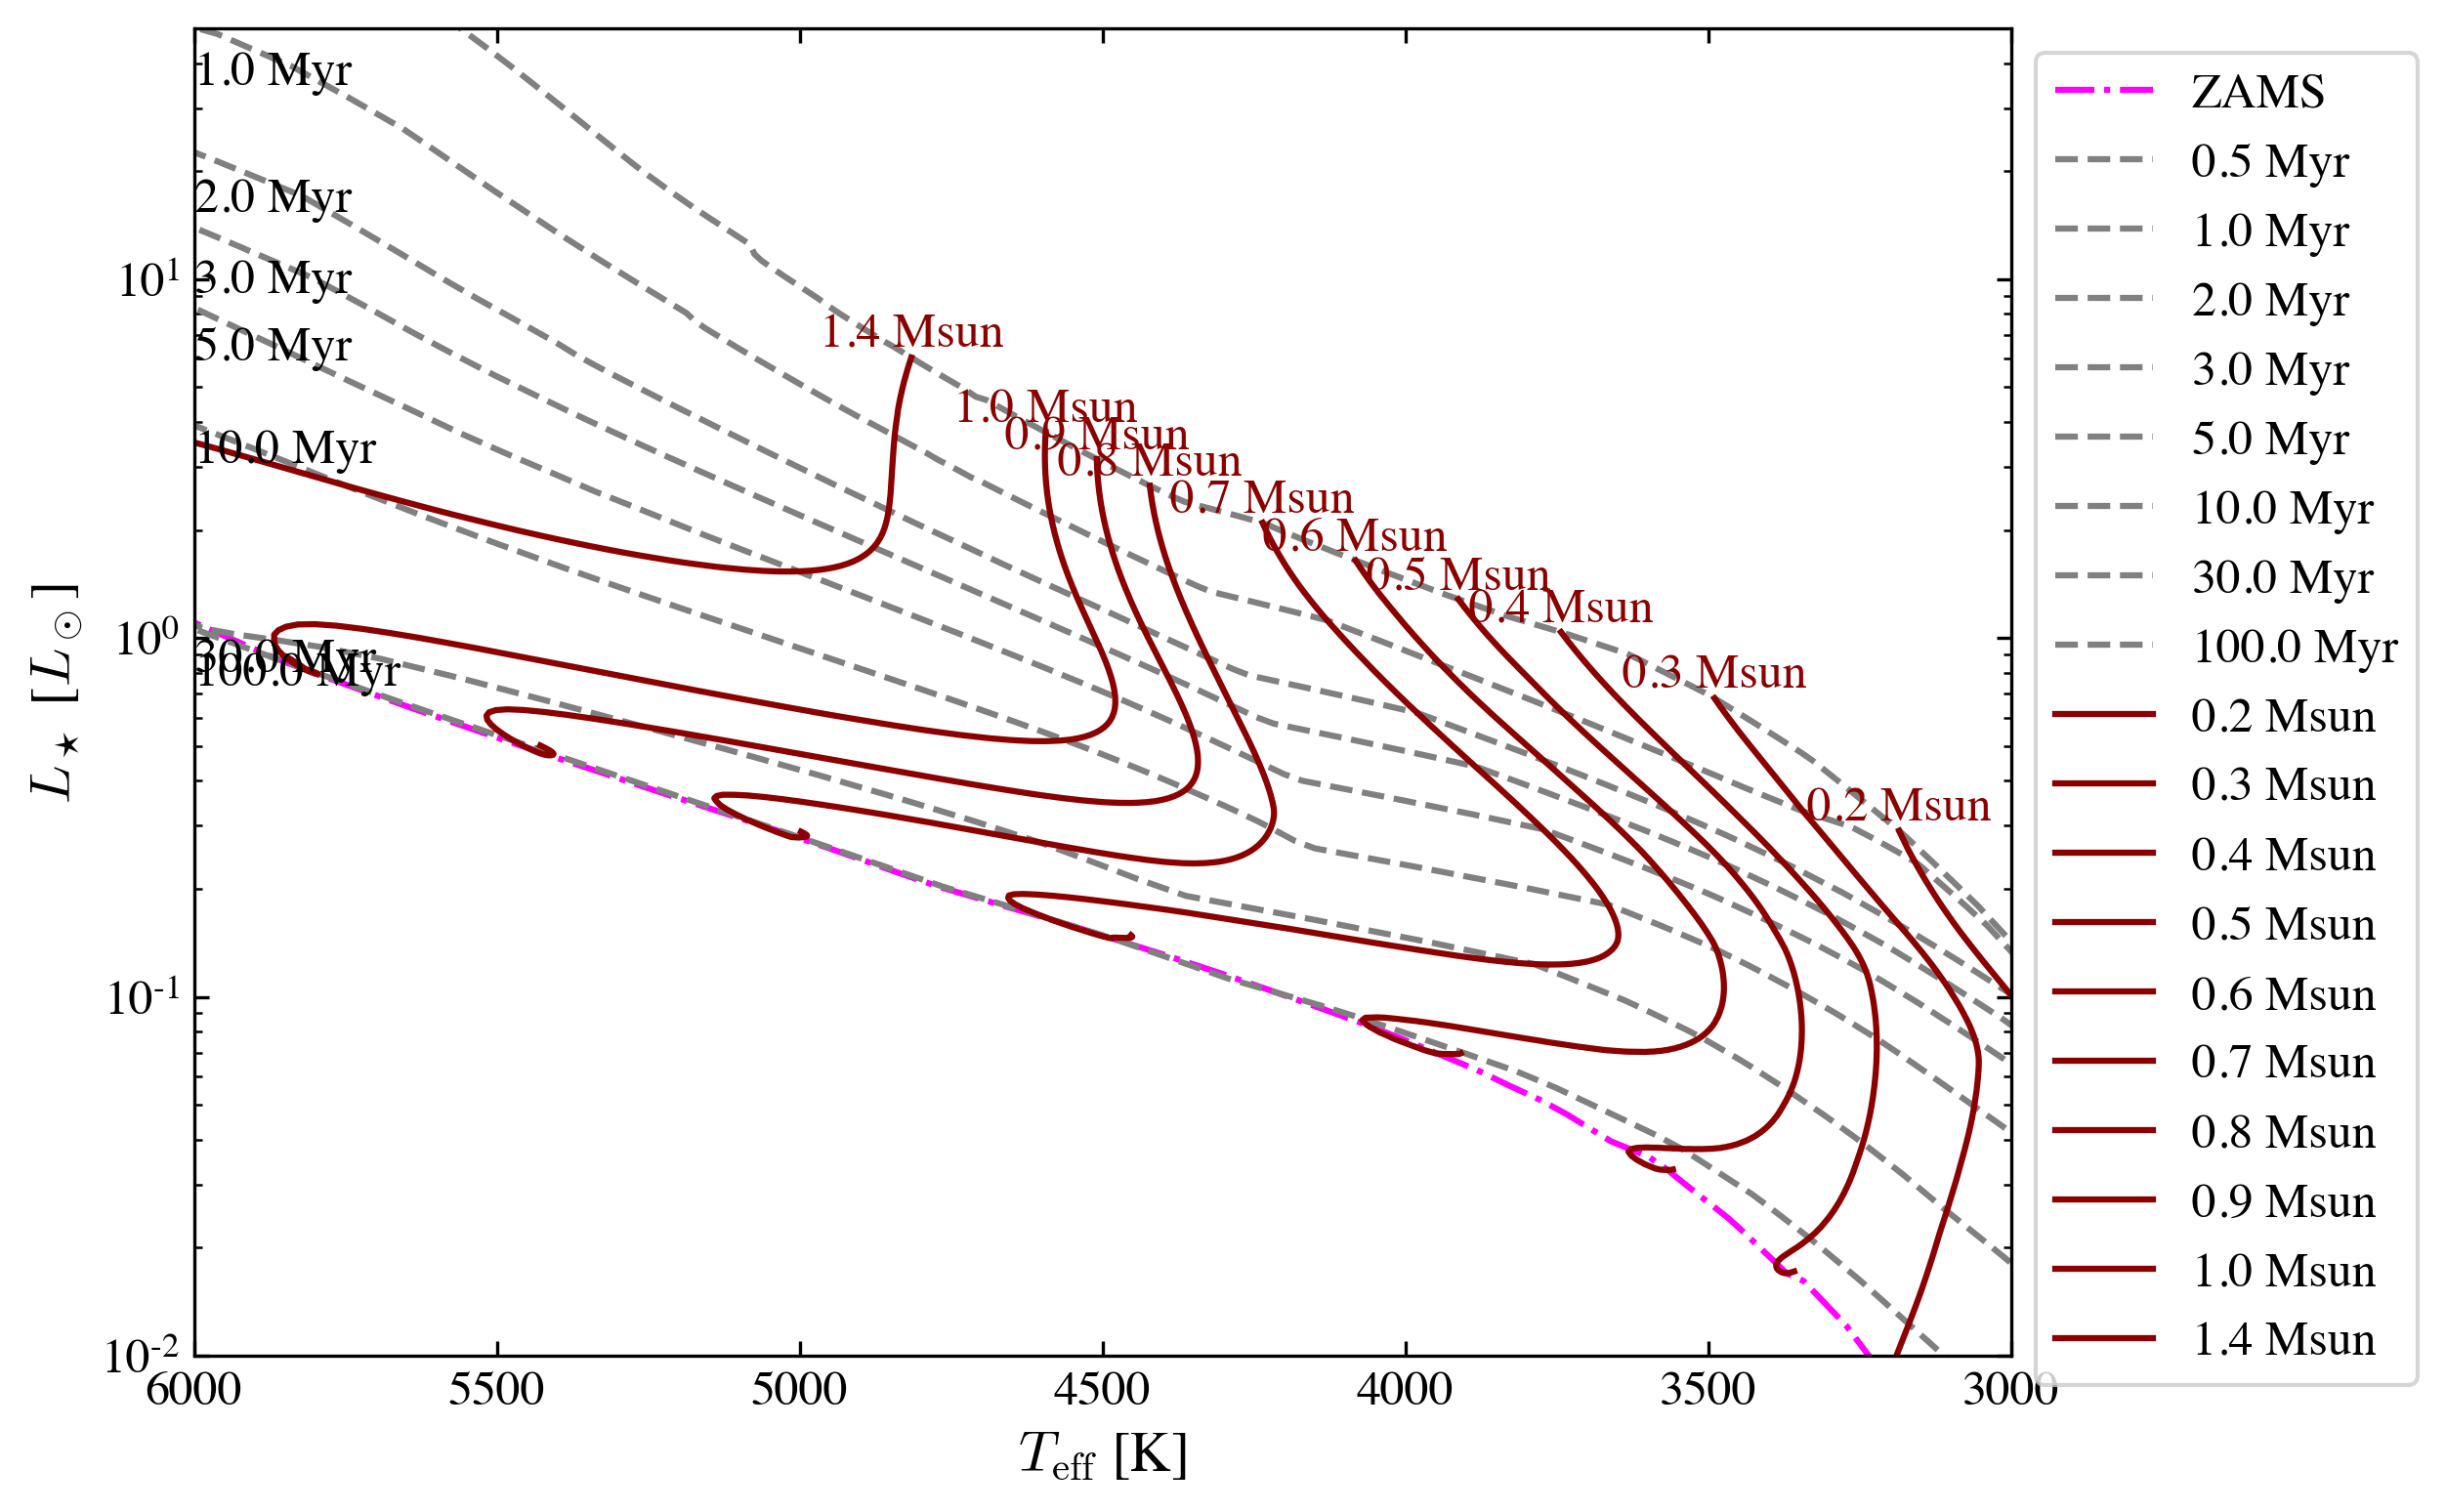

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

# isochrone = ysoisochrone.isochrone.Isochrone()
# mat_file_dir = './isochrones_data/Baraffe_AgeMassGrid_YSO_up100Myrs_matrix.mat'

# isochrone.set_tracks('customize', load_file=mat_file_dir)

isochrone.set_tracks('parsec')

# ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax, 
#                                       ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 50.0e6, 100.0e6], 
#                                       masses_to_plot=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 3.0])

# ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
#                                       masses_to_plot=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
                                      ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], 
                                      masses_to_plot=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.39],
                                      xlim_set=[6000, 3000], ylim_set=[0.01, 50.0])

# ax.set_xlim(7000, 5000)
# ax.set_ylim(0.5, 10) # , 50.0)

plt.show()

check the MIST tracks

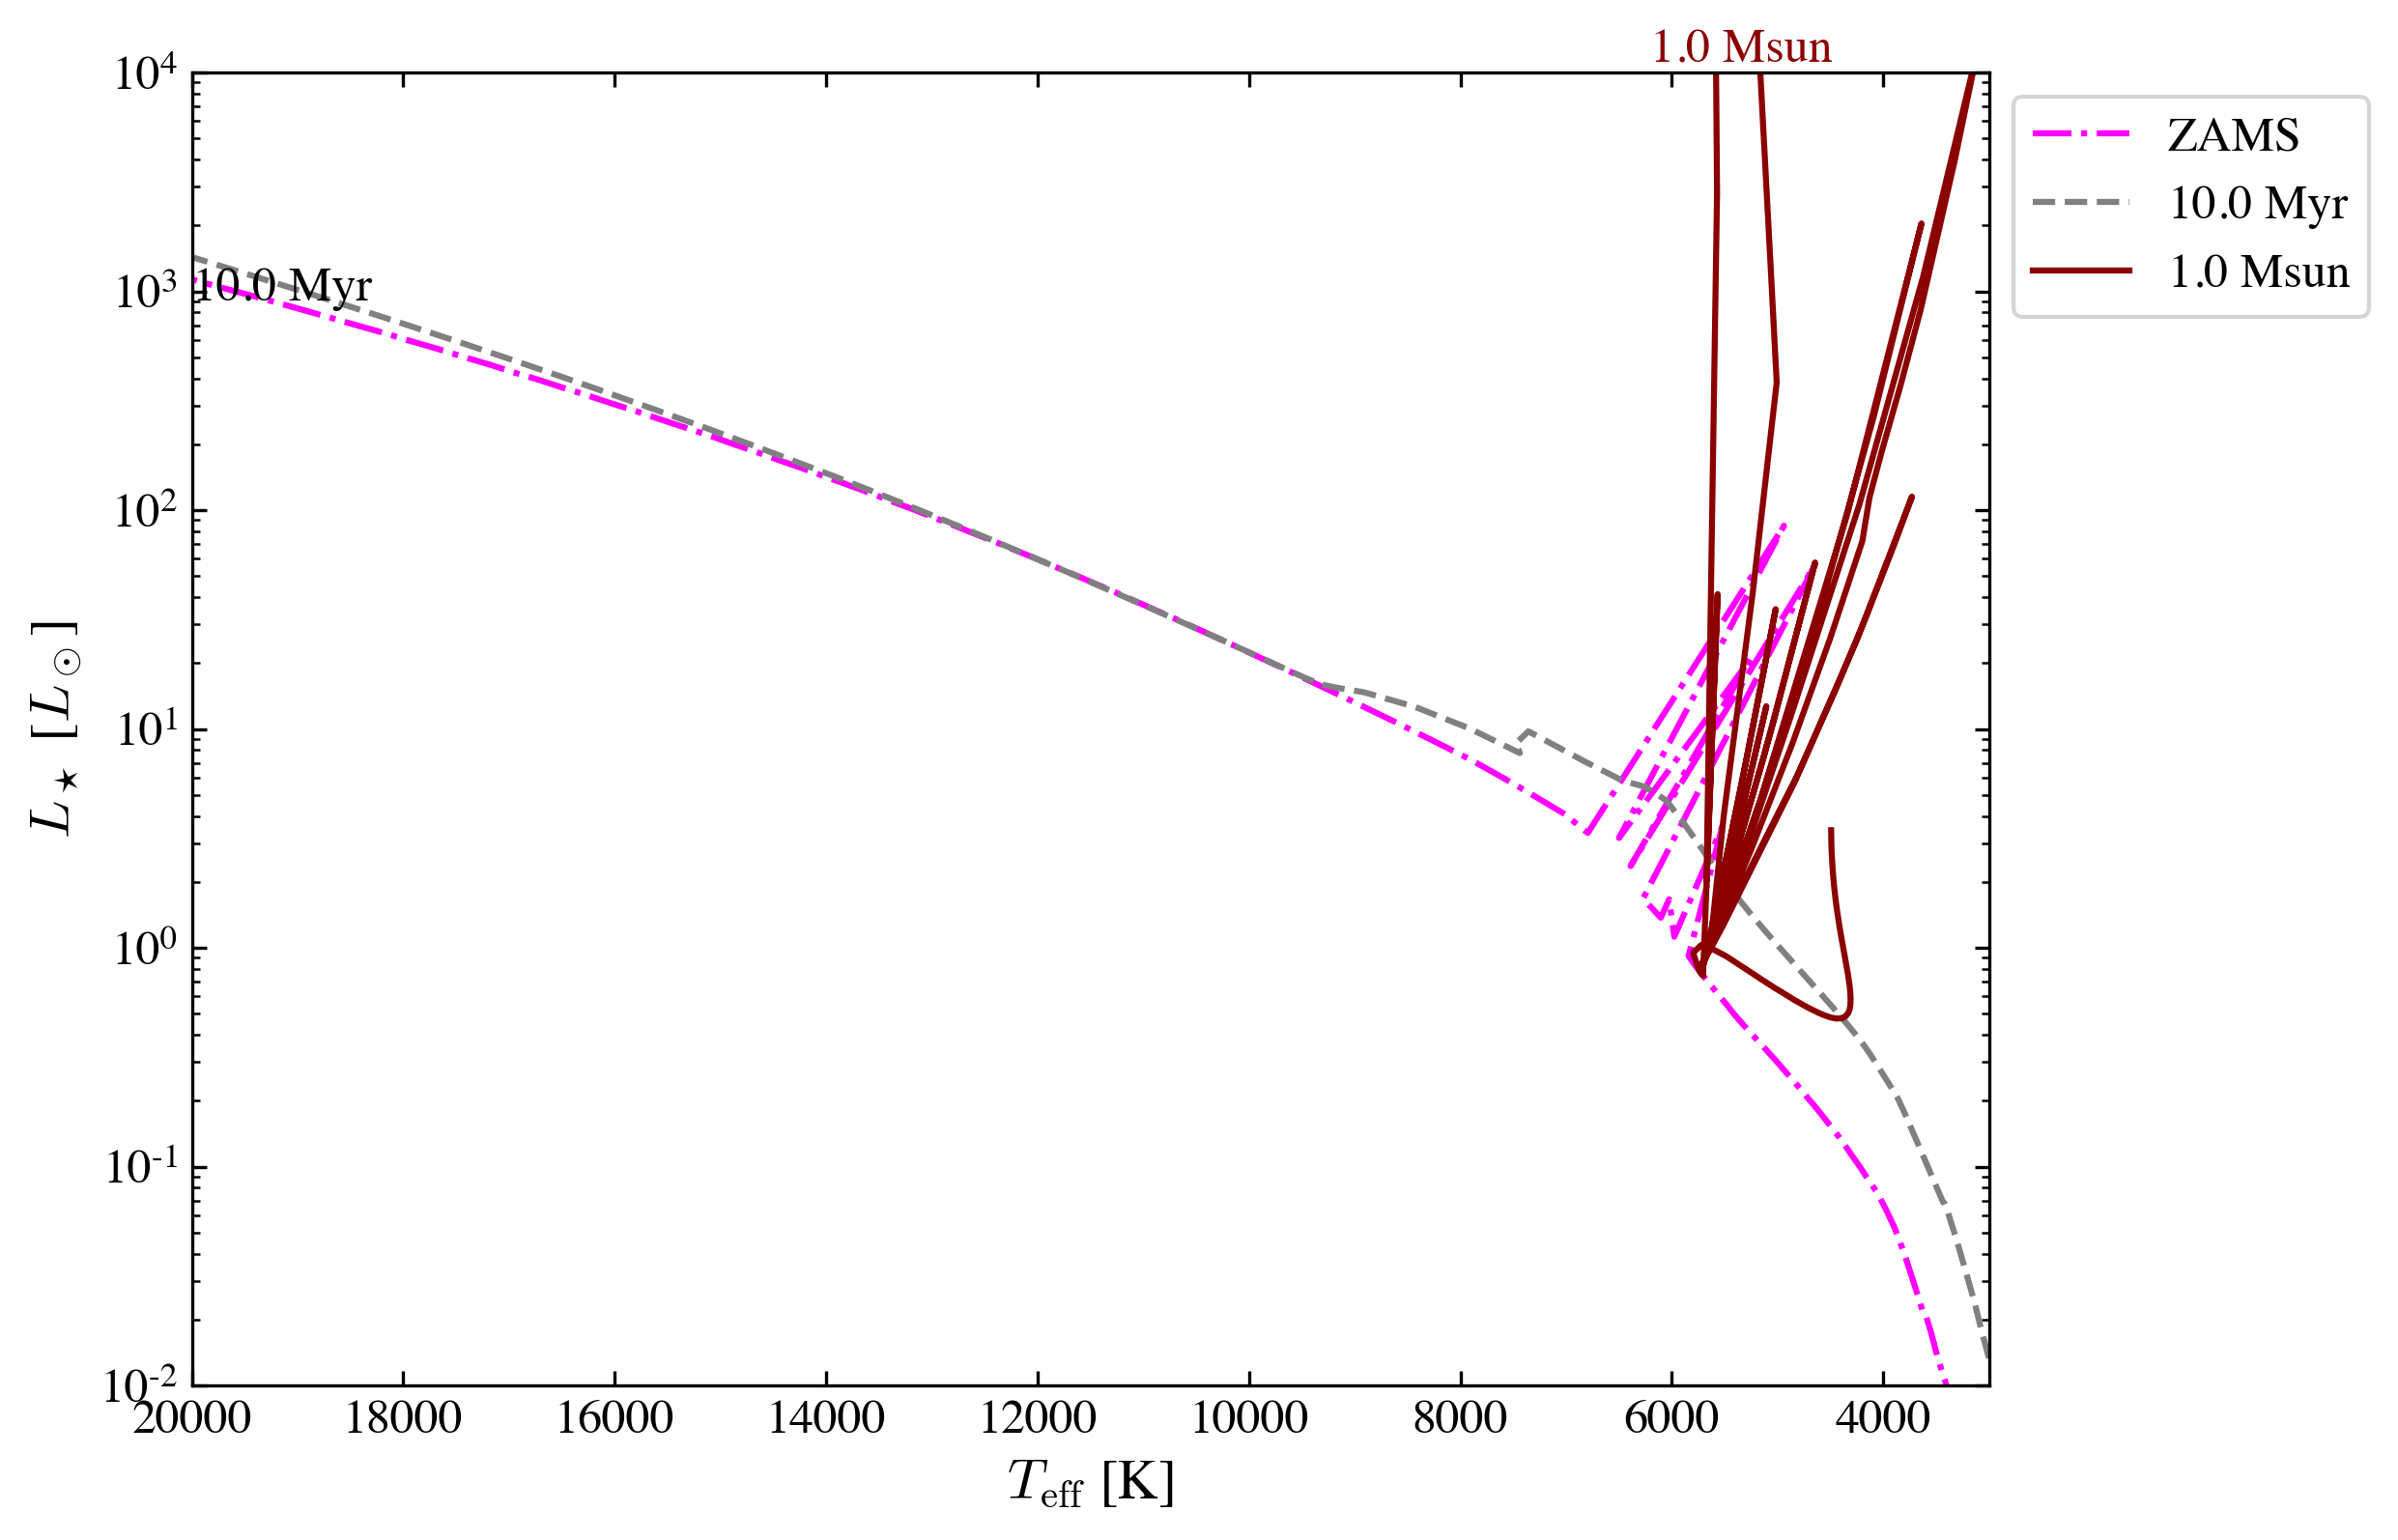

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
# mat_file_dir = './isochrones_data_archive/MIST_v1p2_AgeMassGrid_YSO_matrix.mat'
# mat_file_dir = './isochrones_data/MIST_v1p2_AgeMassGrid_YSO_to100Myrs_matrix.mat'

# isochrone.set_tracks('customize', load_file=mat_file_dir)

isochrone.set_tracks('mist')

ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
                                      ages_to_plot=[10.e6], 
                                      masses_to_plot=[1.0],
                                      xlim_set=[20000, 3000], ylim_set=[0.01, 1e4])

# ax.set_xlim(6000, 3000)
# ax.set_ylim(0.01, 50.0)

plt.show()

check the PARSECv1.2 tracks

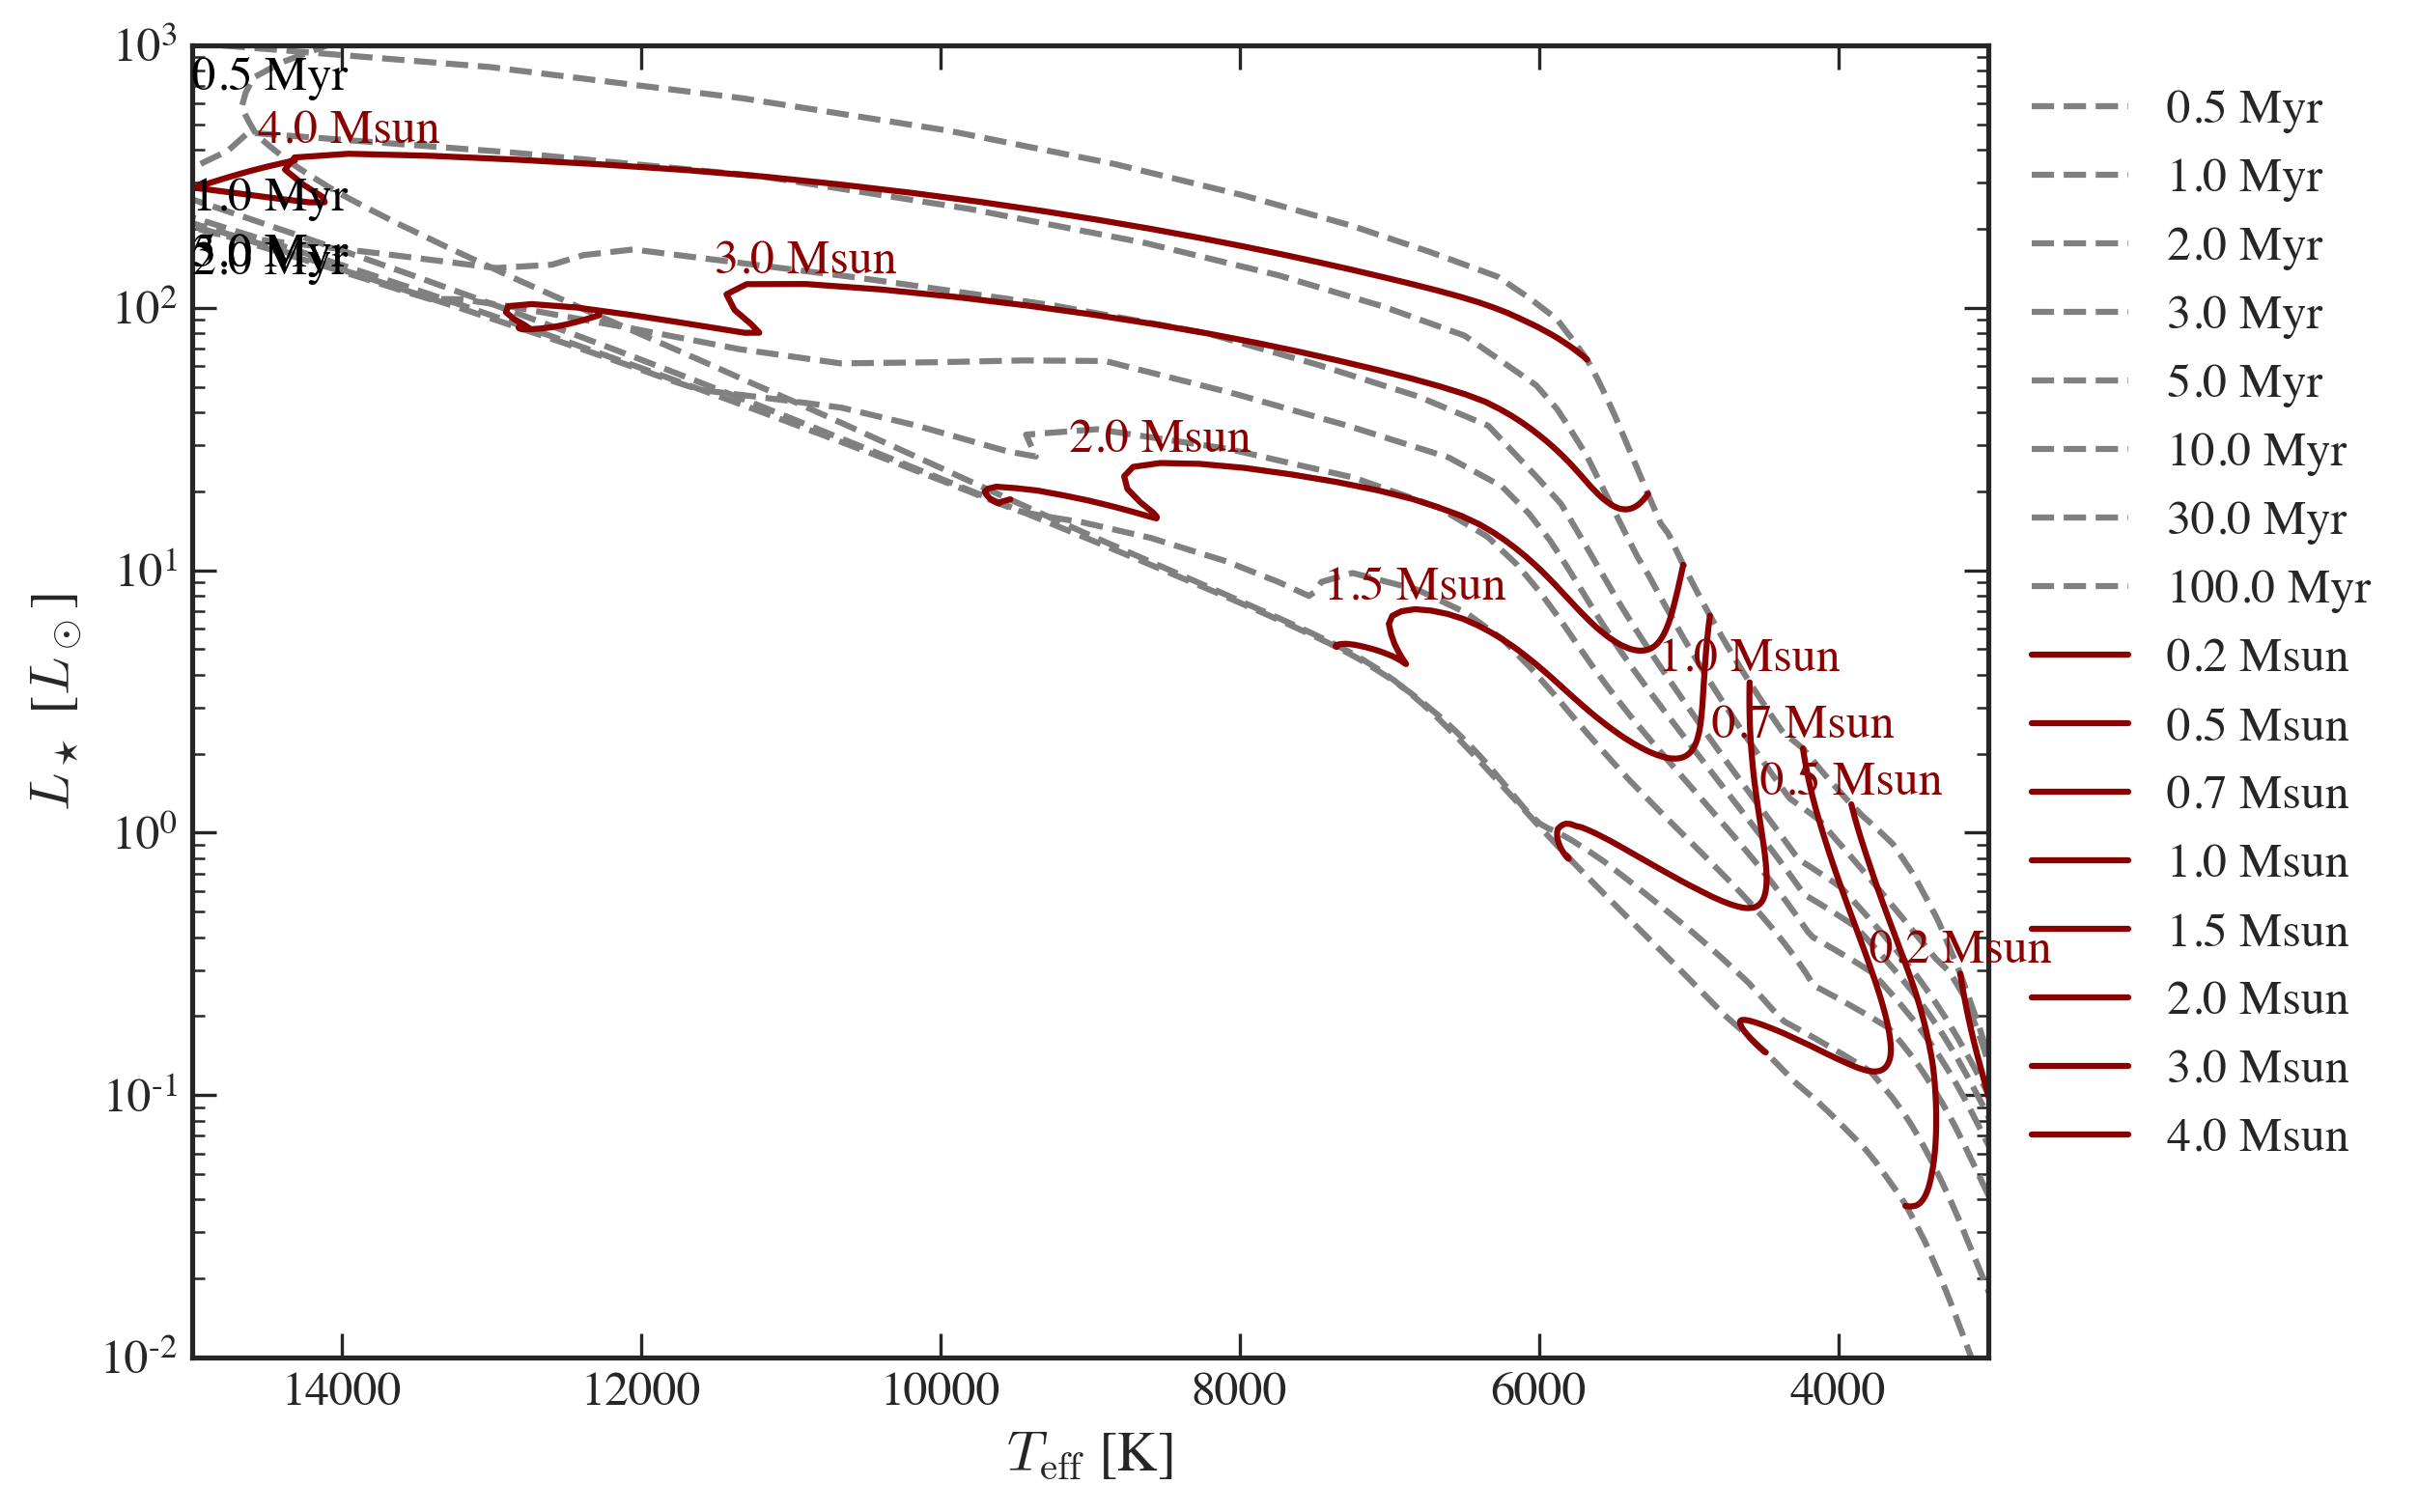

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/PARSECv1p2_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('customize', load_file=mat_file_dir)

# ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)
# ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
#                                       ages_to_plot=[0.50e6],
#                                       masses_to_plot=[0.4, 0.5])

ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
                                      ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], 
                                      masses_to_plot=[0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0],
                                      xlim_set=[15000, 3000], ylim_set=[0.01, 1000.0])

# ax.set_xlim(4500, 3000)
# ax.set_ylim(0.01, 5.0)

plt.show()

check the PARSEC v2.0 tracks

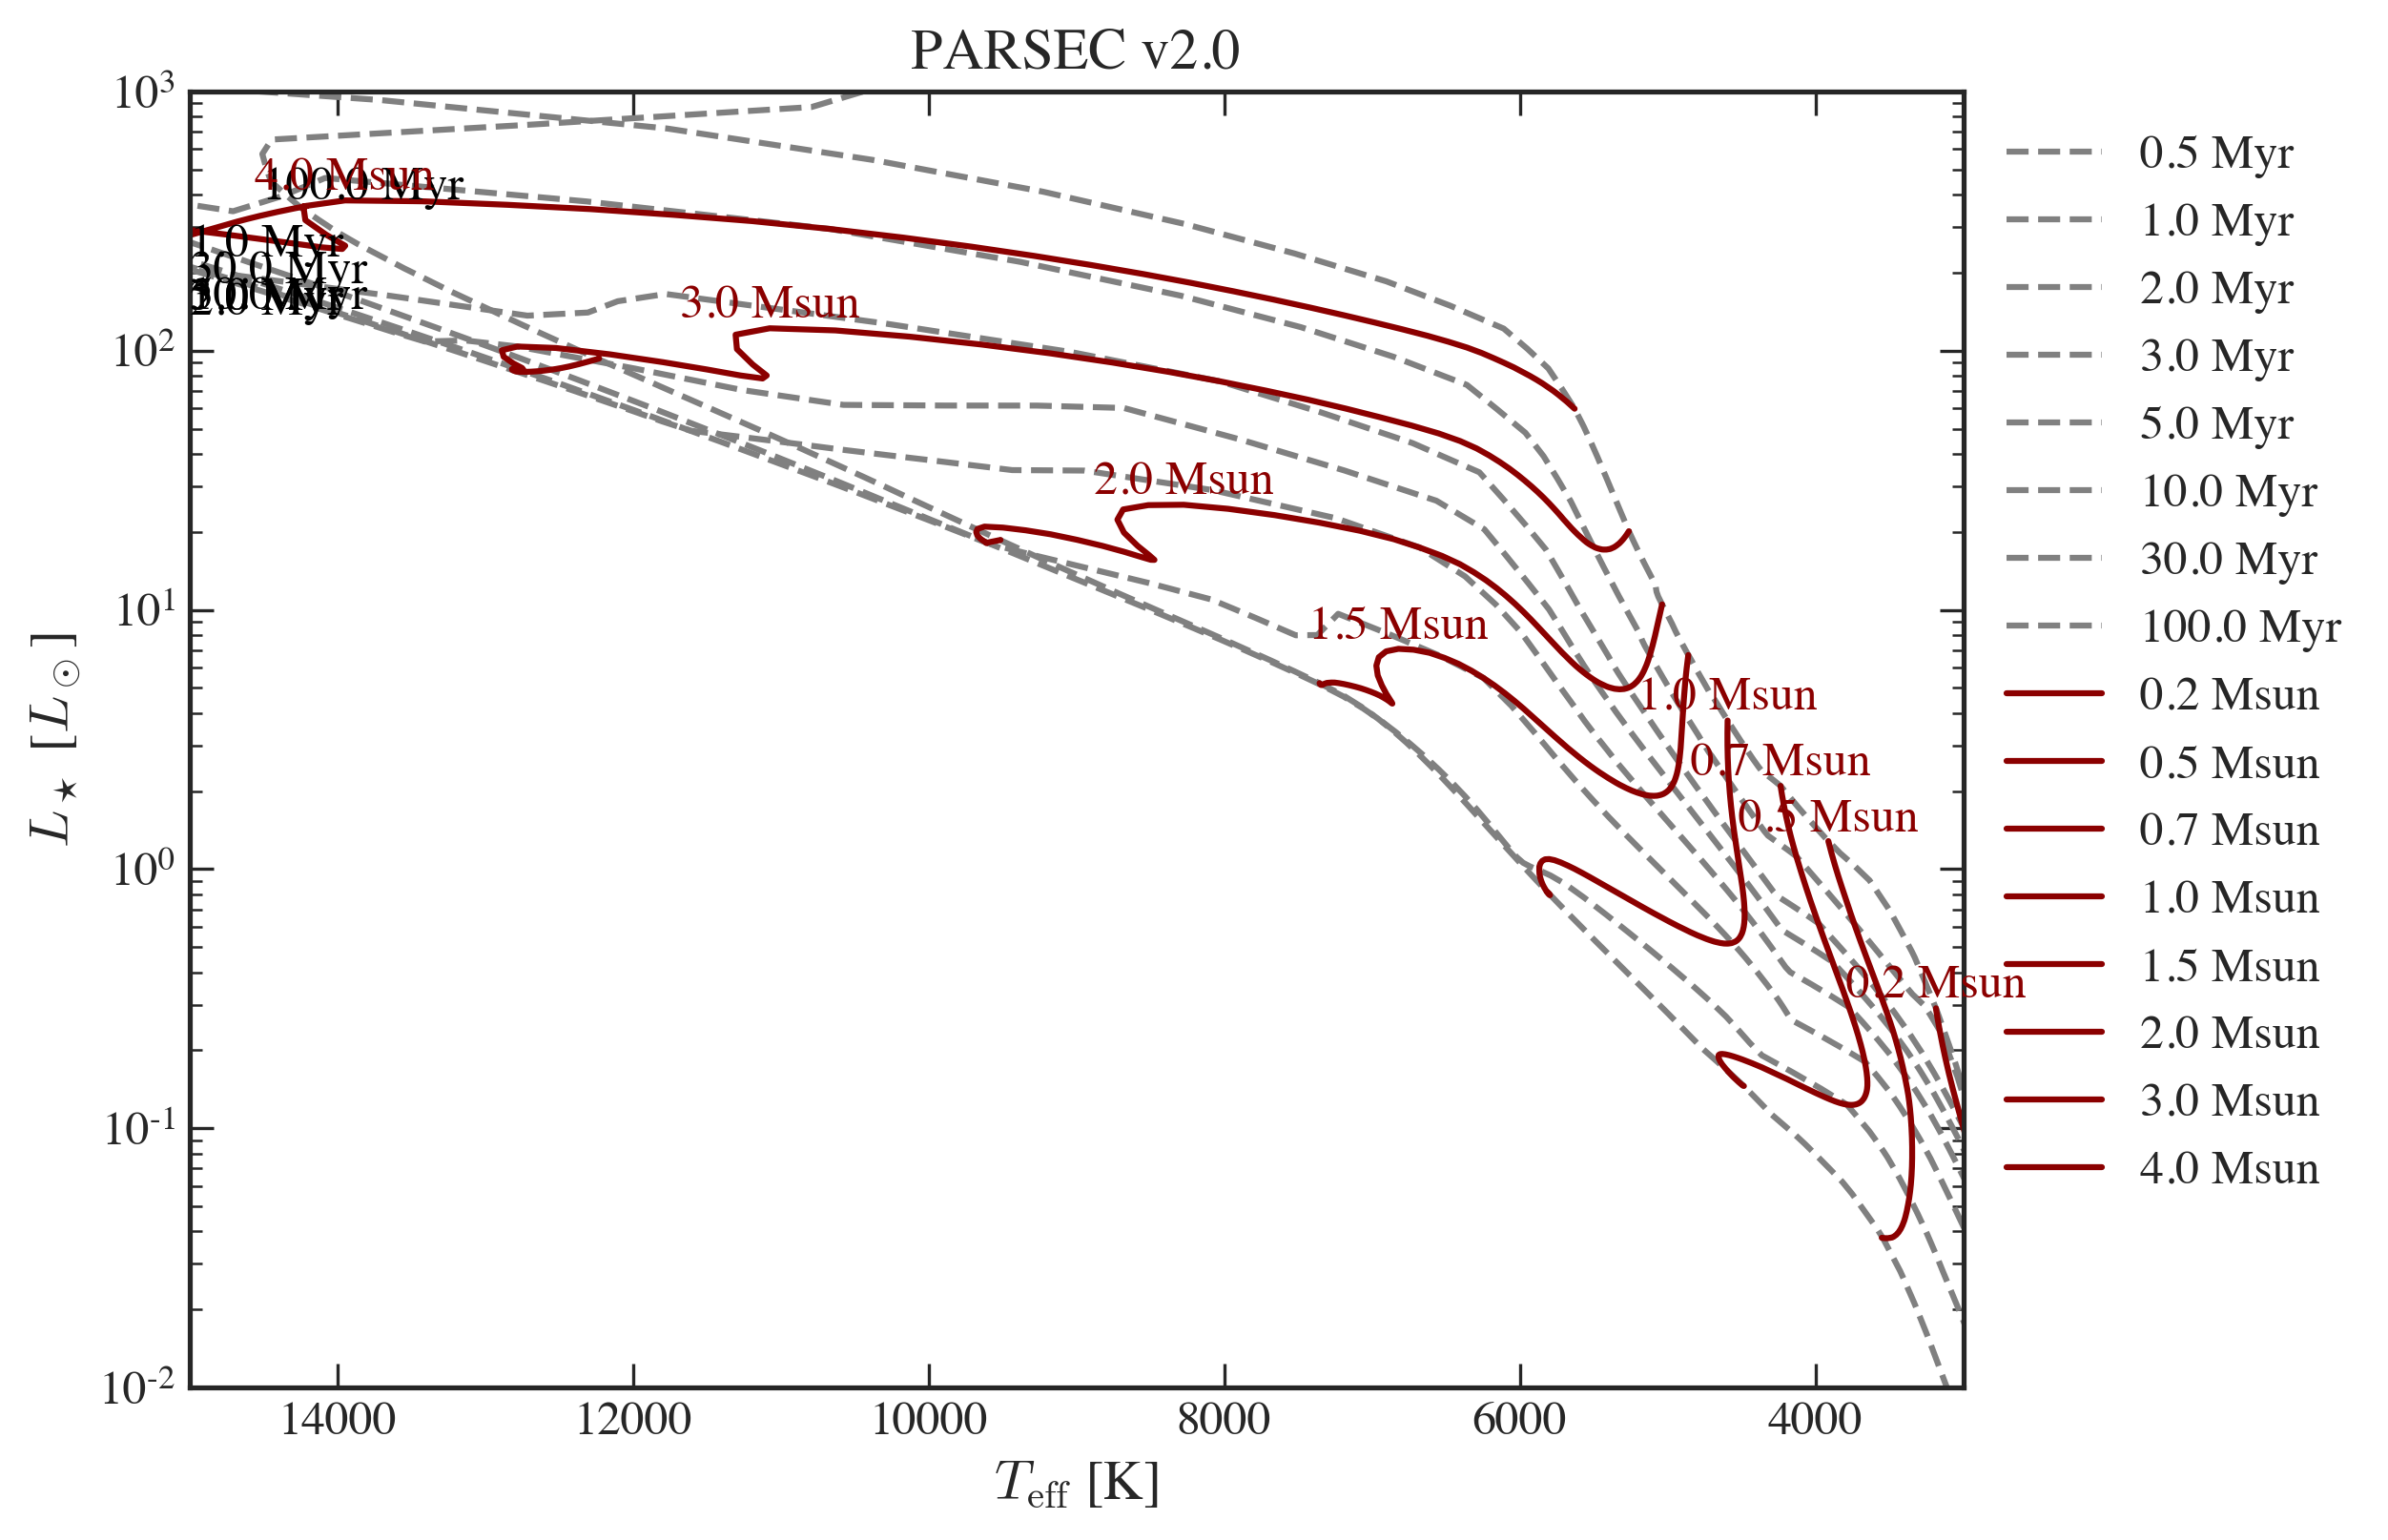

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/PARSECv2p0_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('customize', load_file=mat_file_dir)

# ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)
# ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
#                                       ages_to_plot=[0.50e6],
#                                       masses_to_plot=[0.4, 0.5])

ax.set_title('PARSEC v2.0')

ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
                                      ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], 
                                      masses_to_plot=[0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0],
                                      xlim_set=[15000, 3000], ylim_set=[0.01, 1000.0])

# ax.set_xlim(4500, 3000)
# ax.set_ylim(0.01, 5.0)

plt.show()

for Feiden tracks
there are currently three of them

```
# Load the saved .mat file
# loaded_data_py = scipy.io.loadmat('./isochrones_data/Feiden_AgeMassGrid_YSO_matrix.mat')
# loaded_data_py = scipy.io.loadmat('./isochrones_data/Feiden_trkP2016_AgeMassGrid_YSO_matrix.mat')
# loaded_data_py = scipy.io.loadmat('./isochrones_data/Feiden_AgeMassGrid_iso_YSO_matrix.mat') # this one has some problem; ignore for now
```

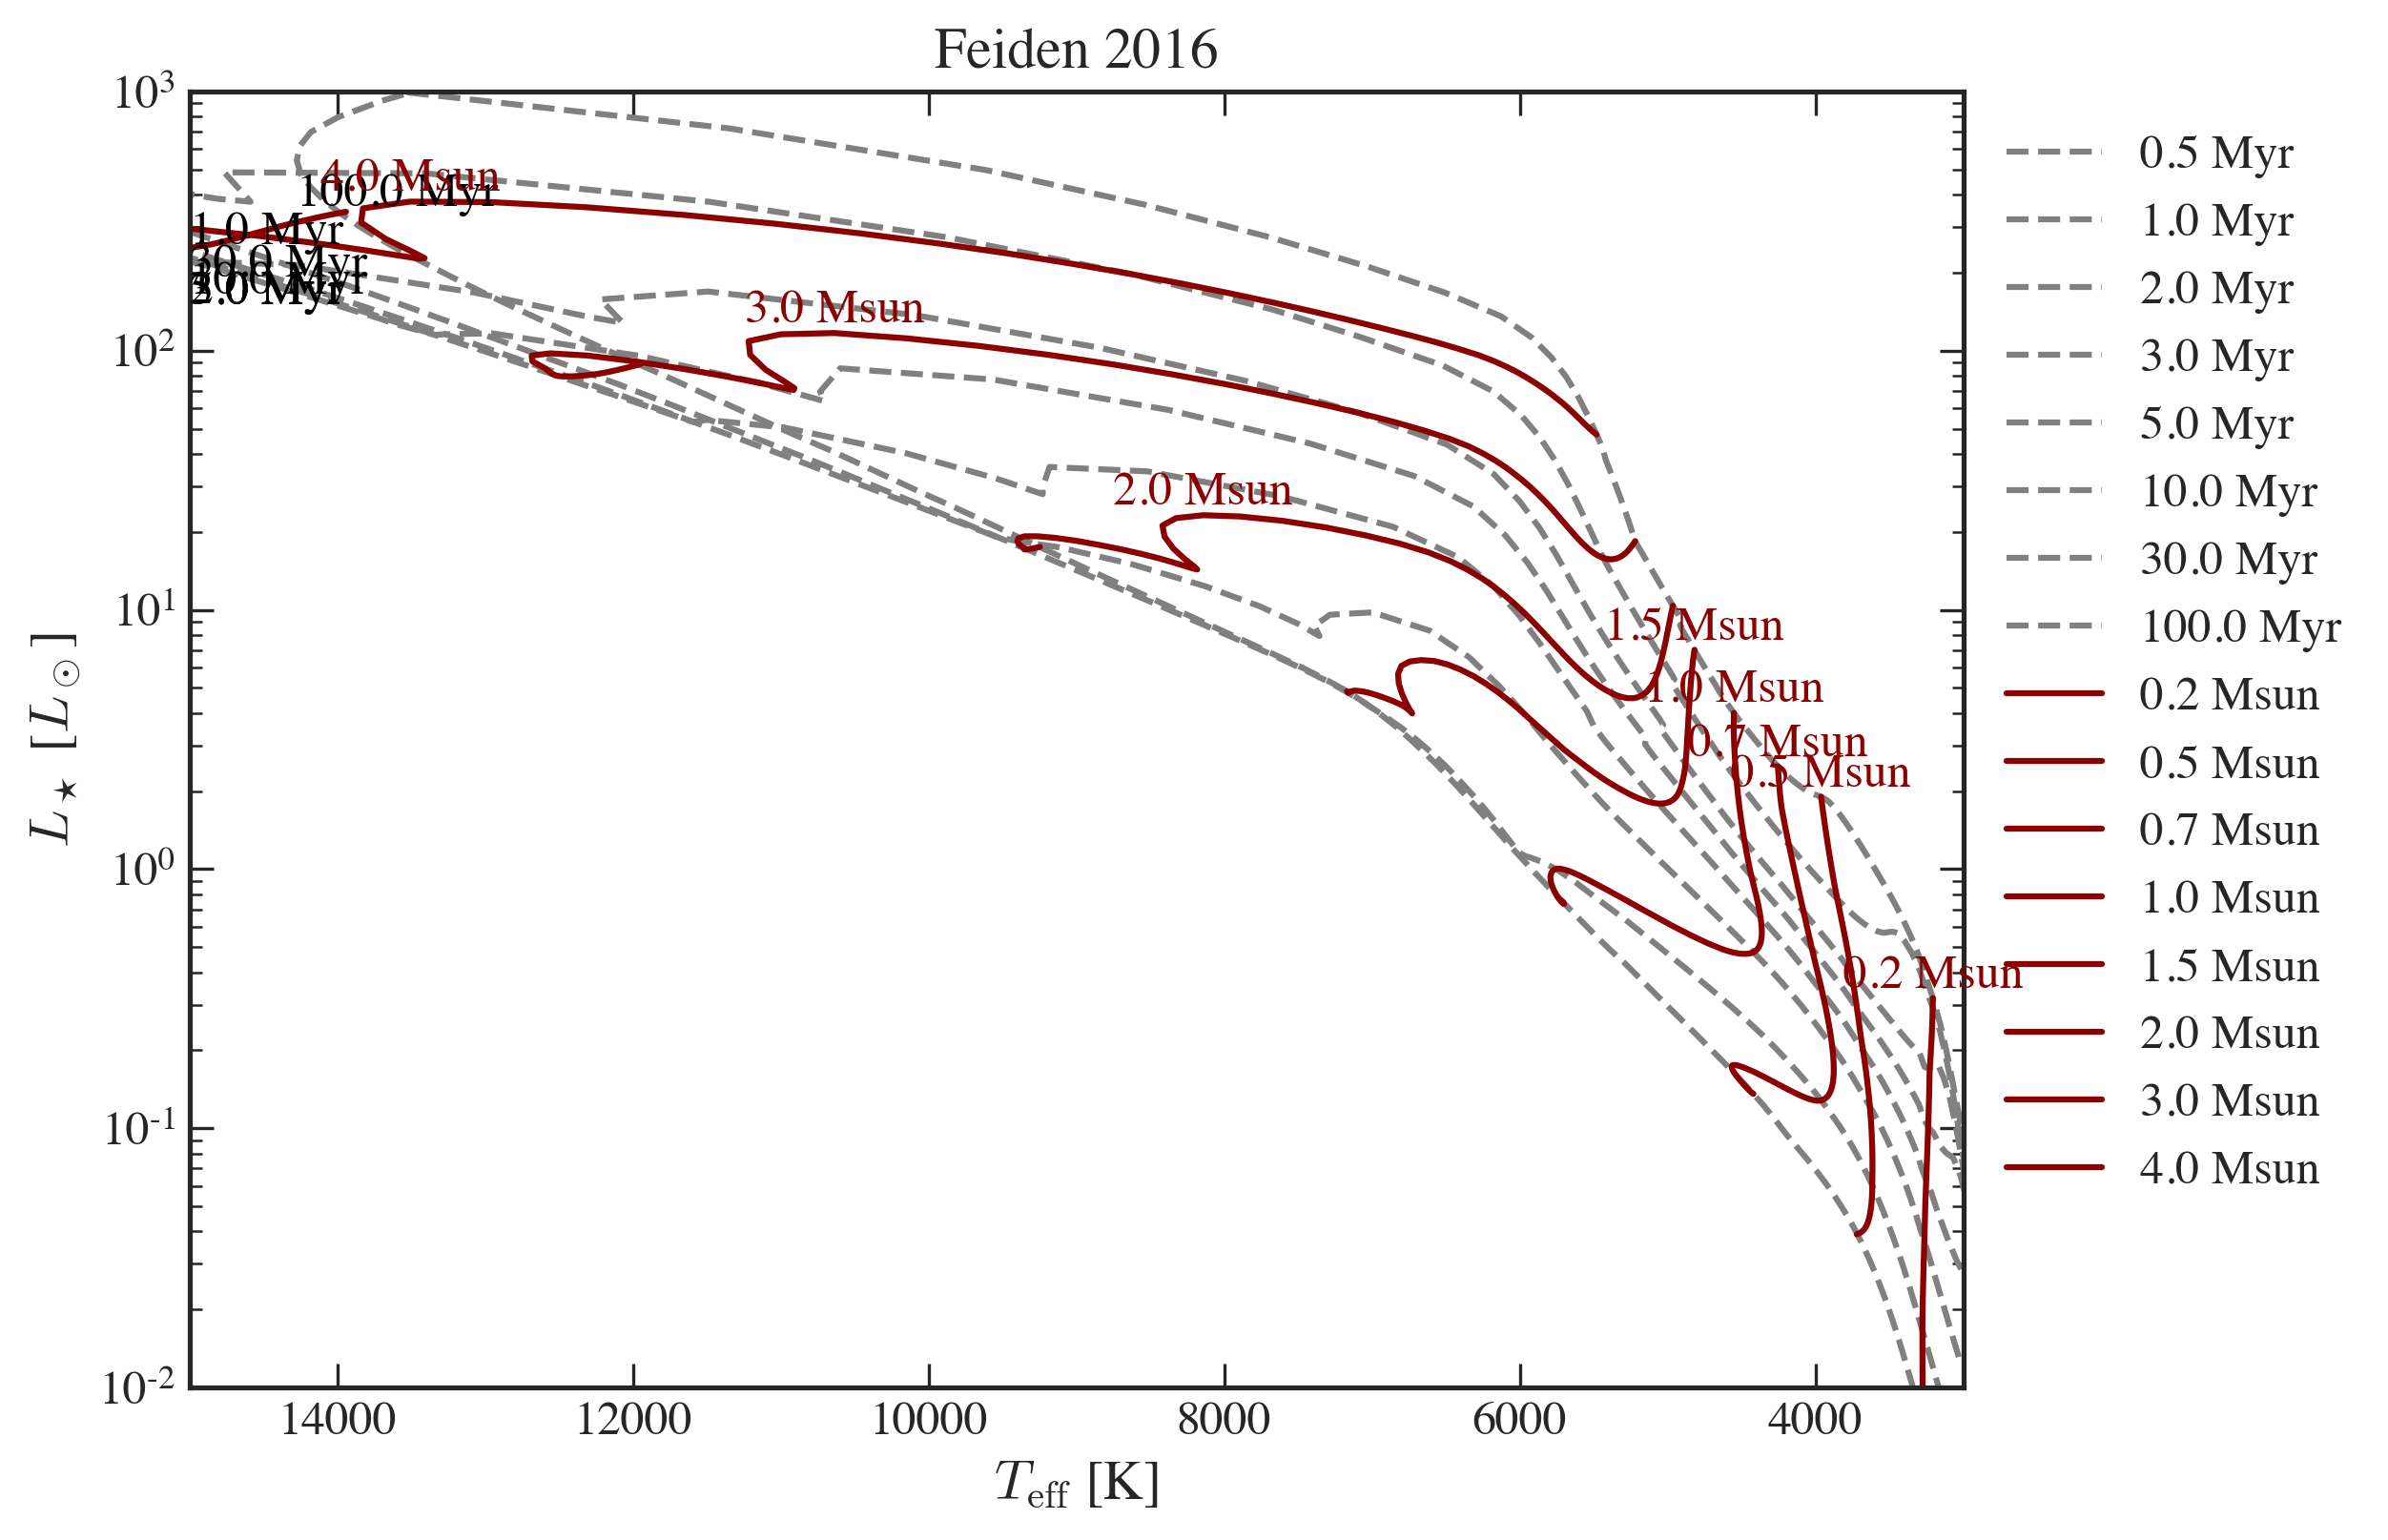

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/Feiden_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('customize', load_file=mat_file_dir)

ax.set_title('Feiden 2016')

ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
                                      ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], 
                                      masses_to_plot=[0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 4.0],
                                      xlim_set=[15000, 3000], ylim_set=[0.01, 1000.0])

plt.show()

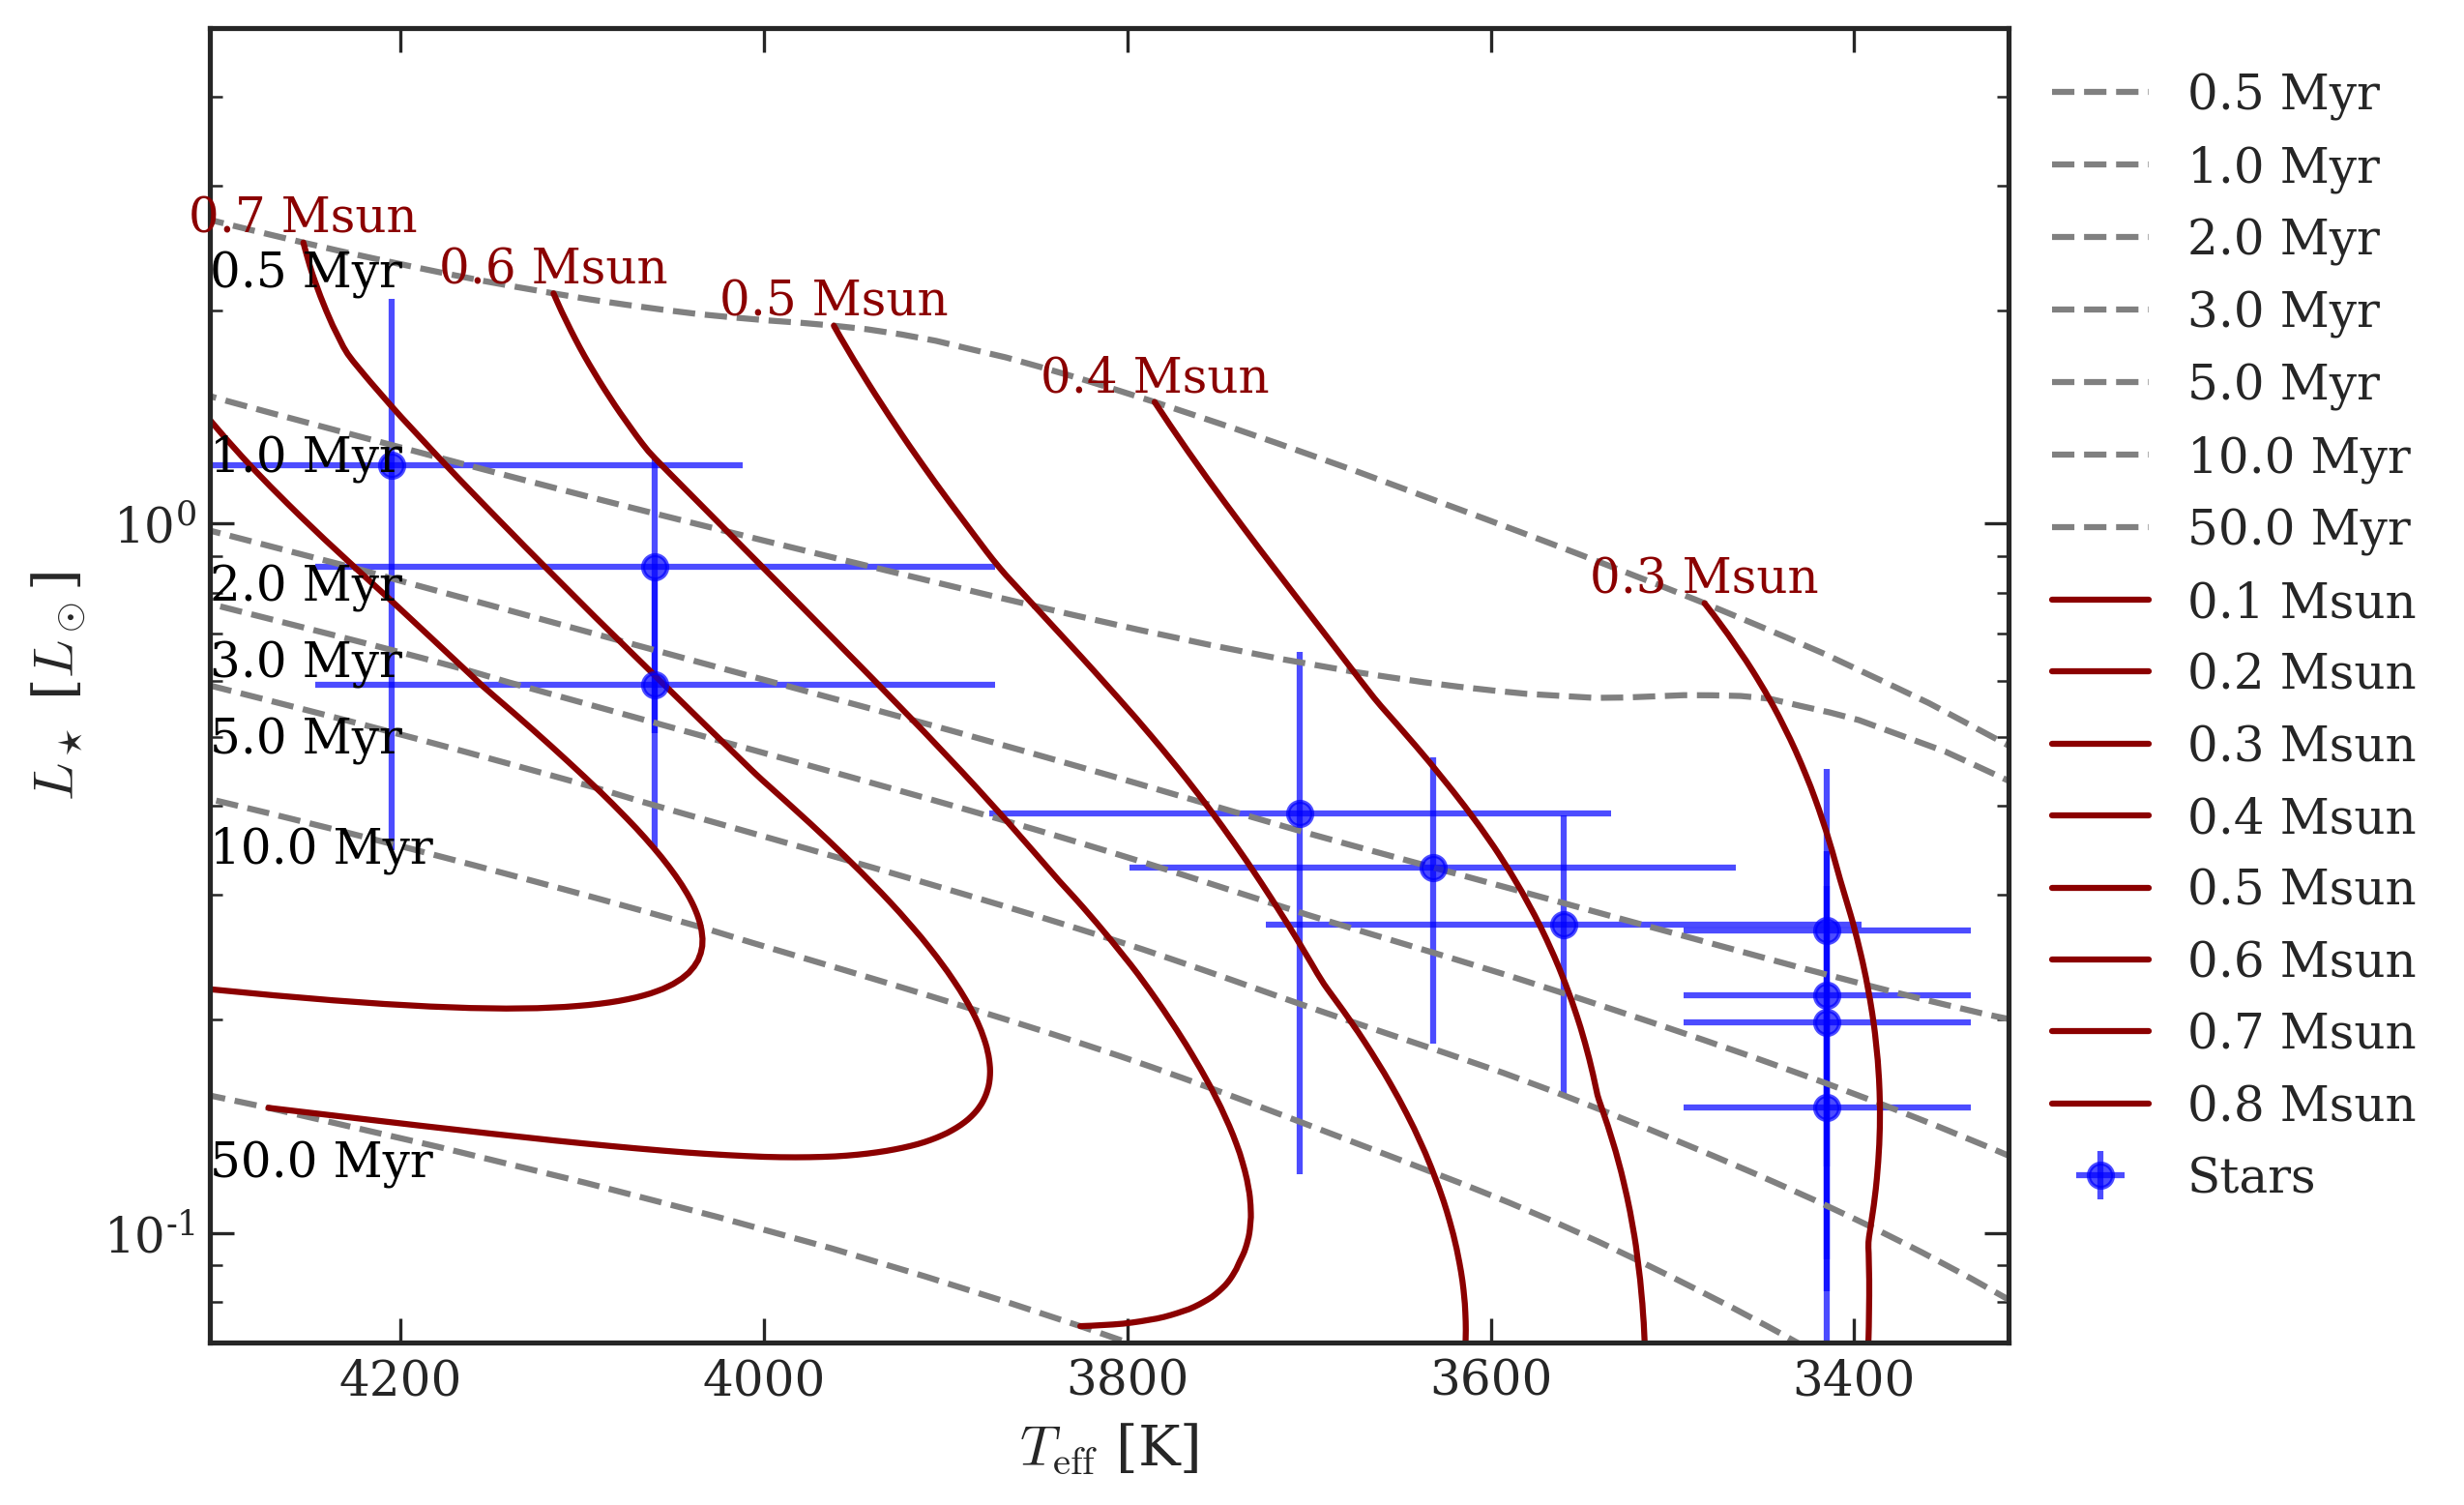

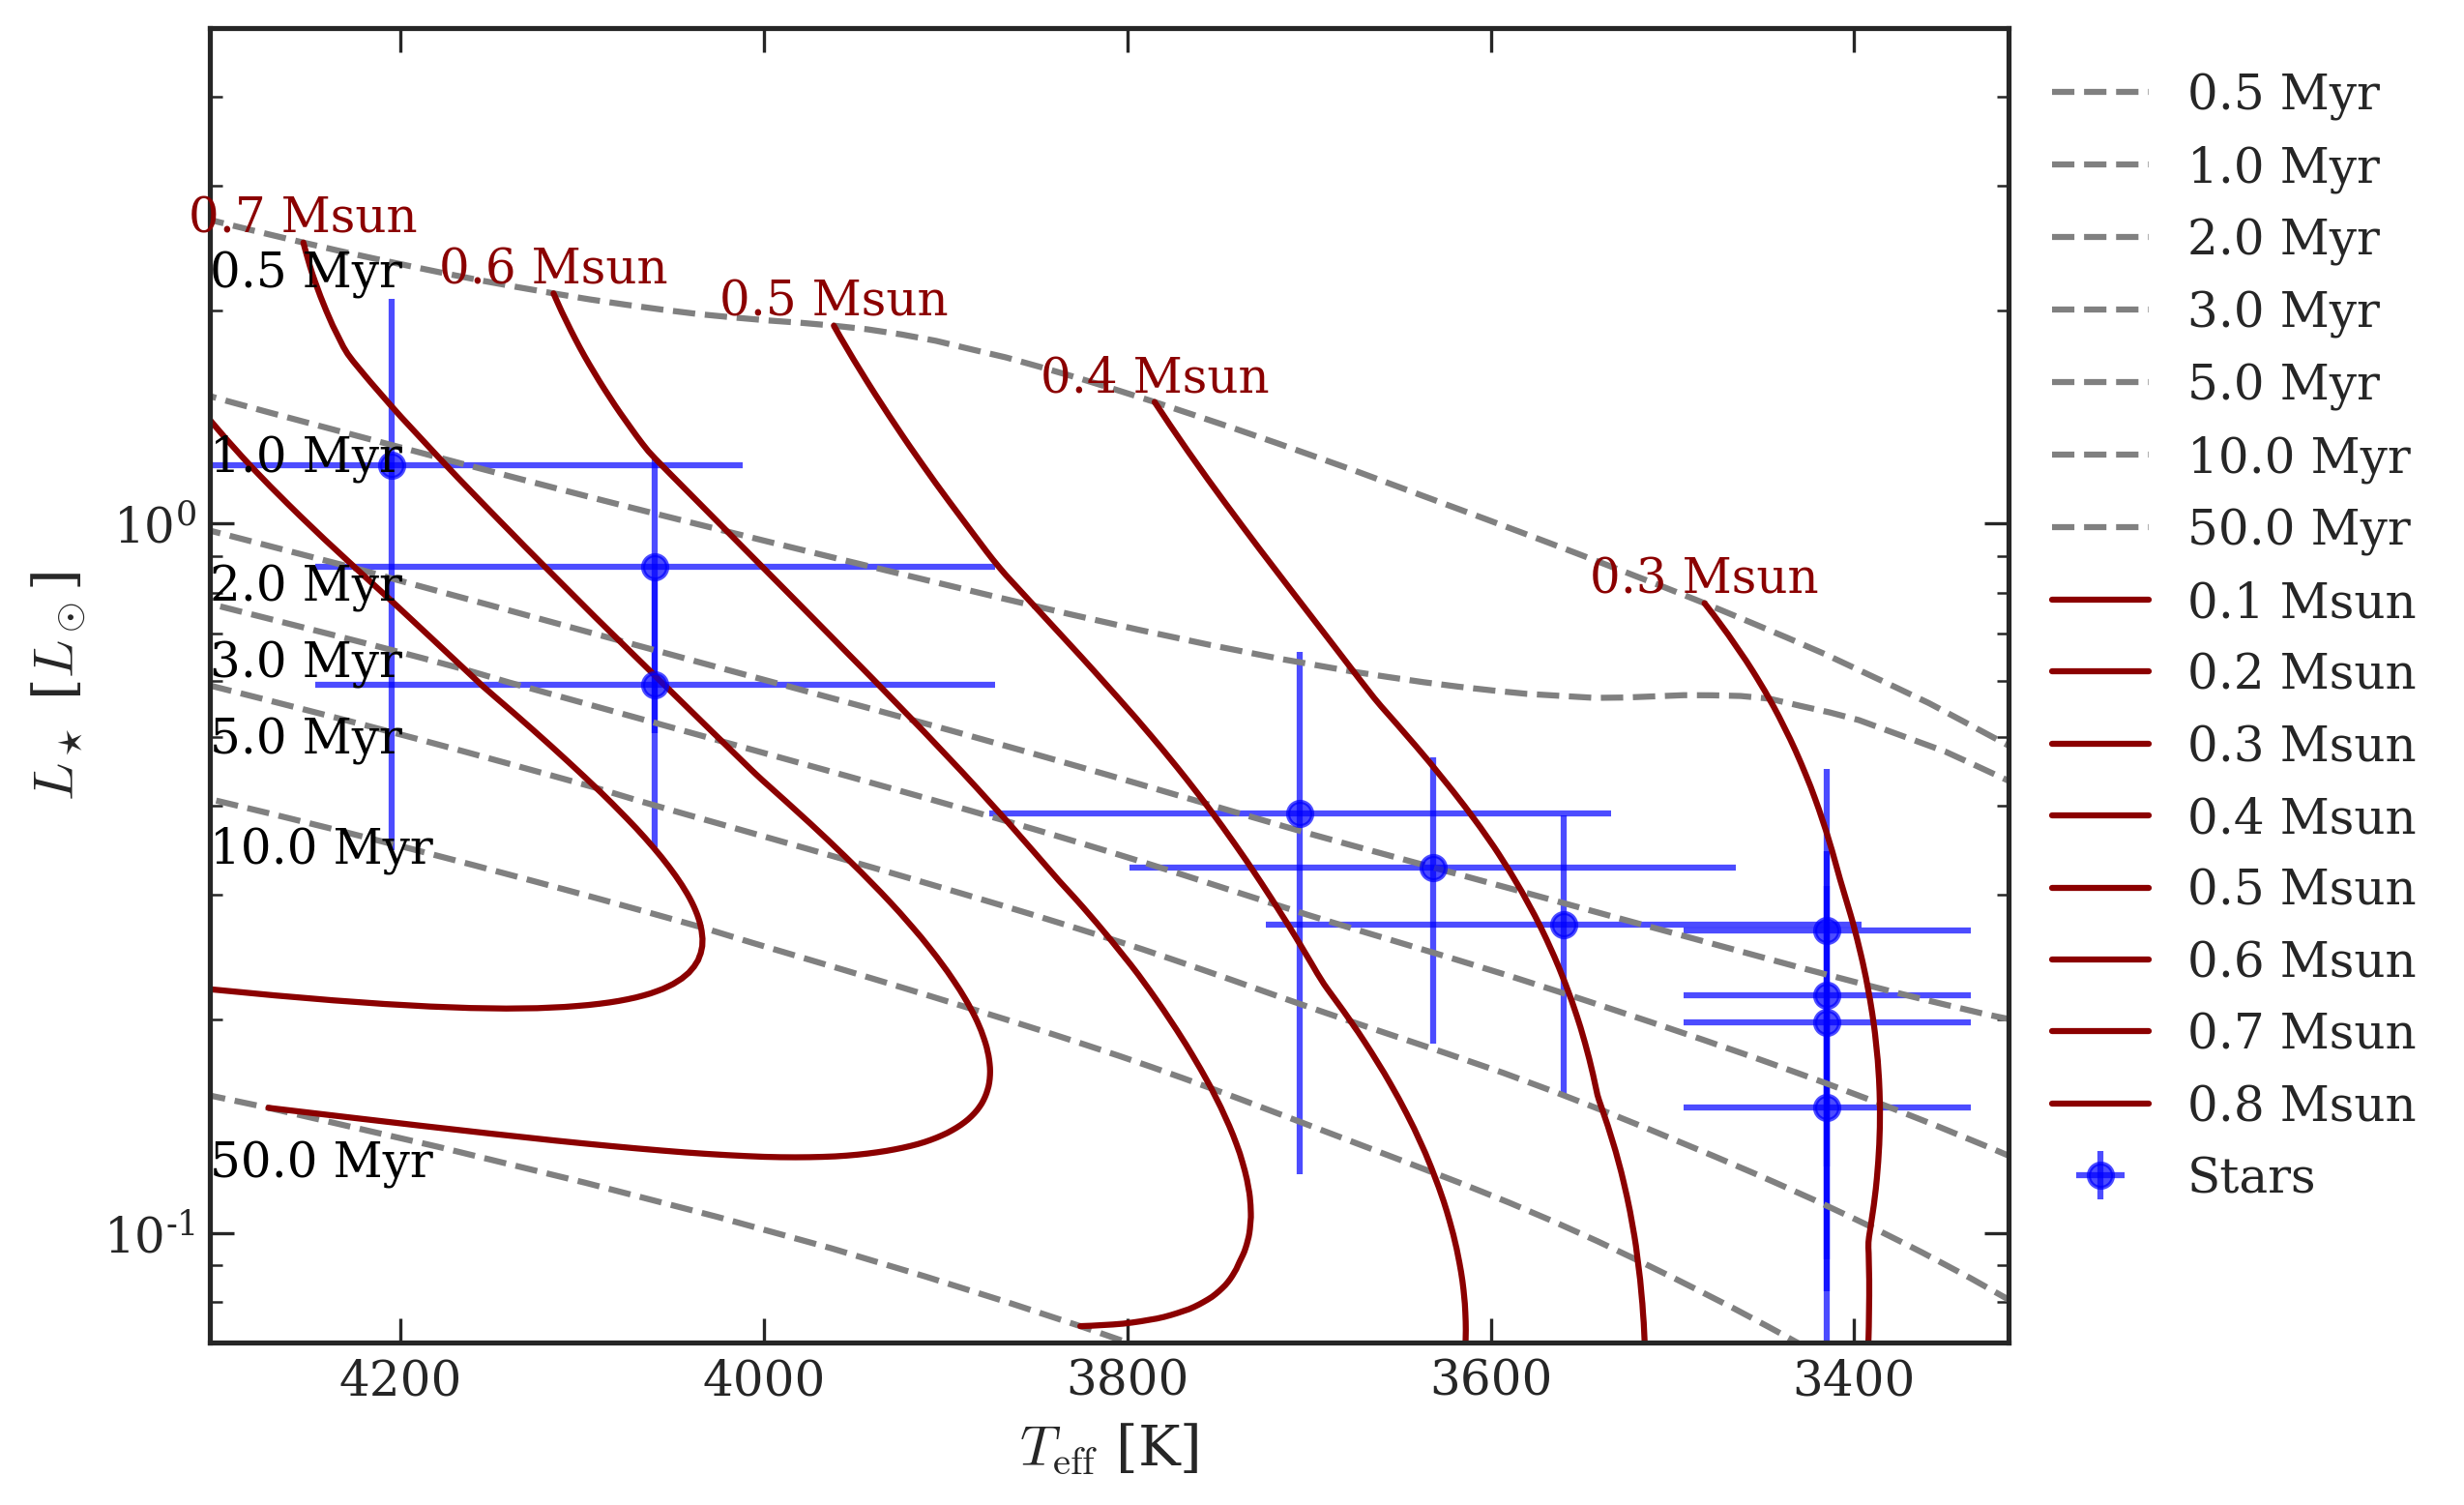

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/Feiden_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('customize', load_file=mat_file_dir)

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)

ax.set_ylim(0.07, 5.0)

"""Figure 2"""

fig, ax = plt.subplots(figsize=(8, 6))

isochrone = ysoisochrone.isochrone.Isochrone()
mat_file_dir = './isochrones_data/Feiden_trkP2016_AgeMassGrid_YSO_matrix.mat'
isochrone.set_tracks('customize', load_file=mat_file_dir)

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax)

ax.set_ylim(0.07, 5.0)

plt.show()

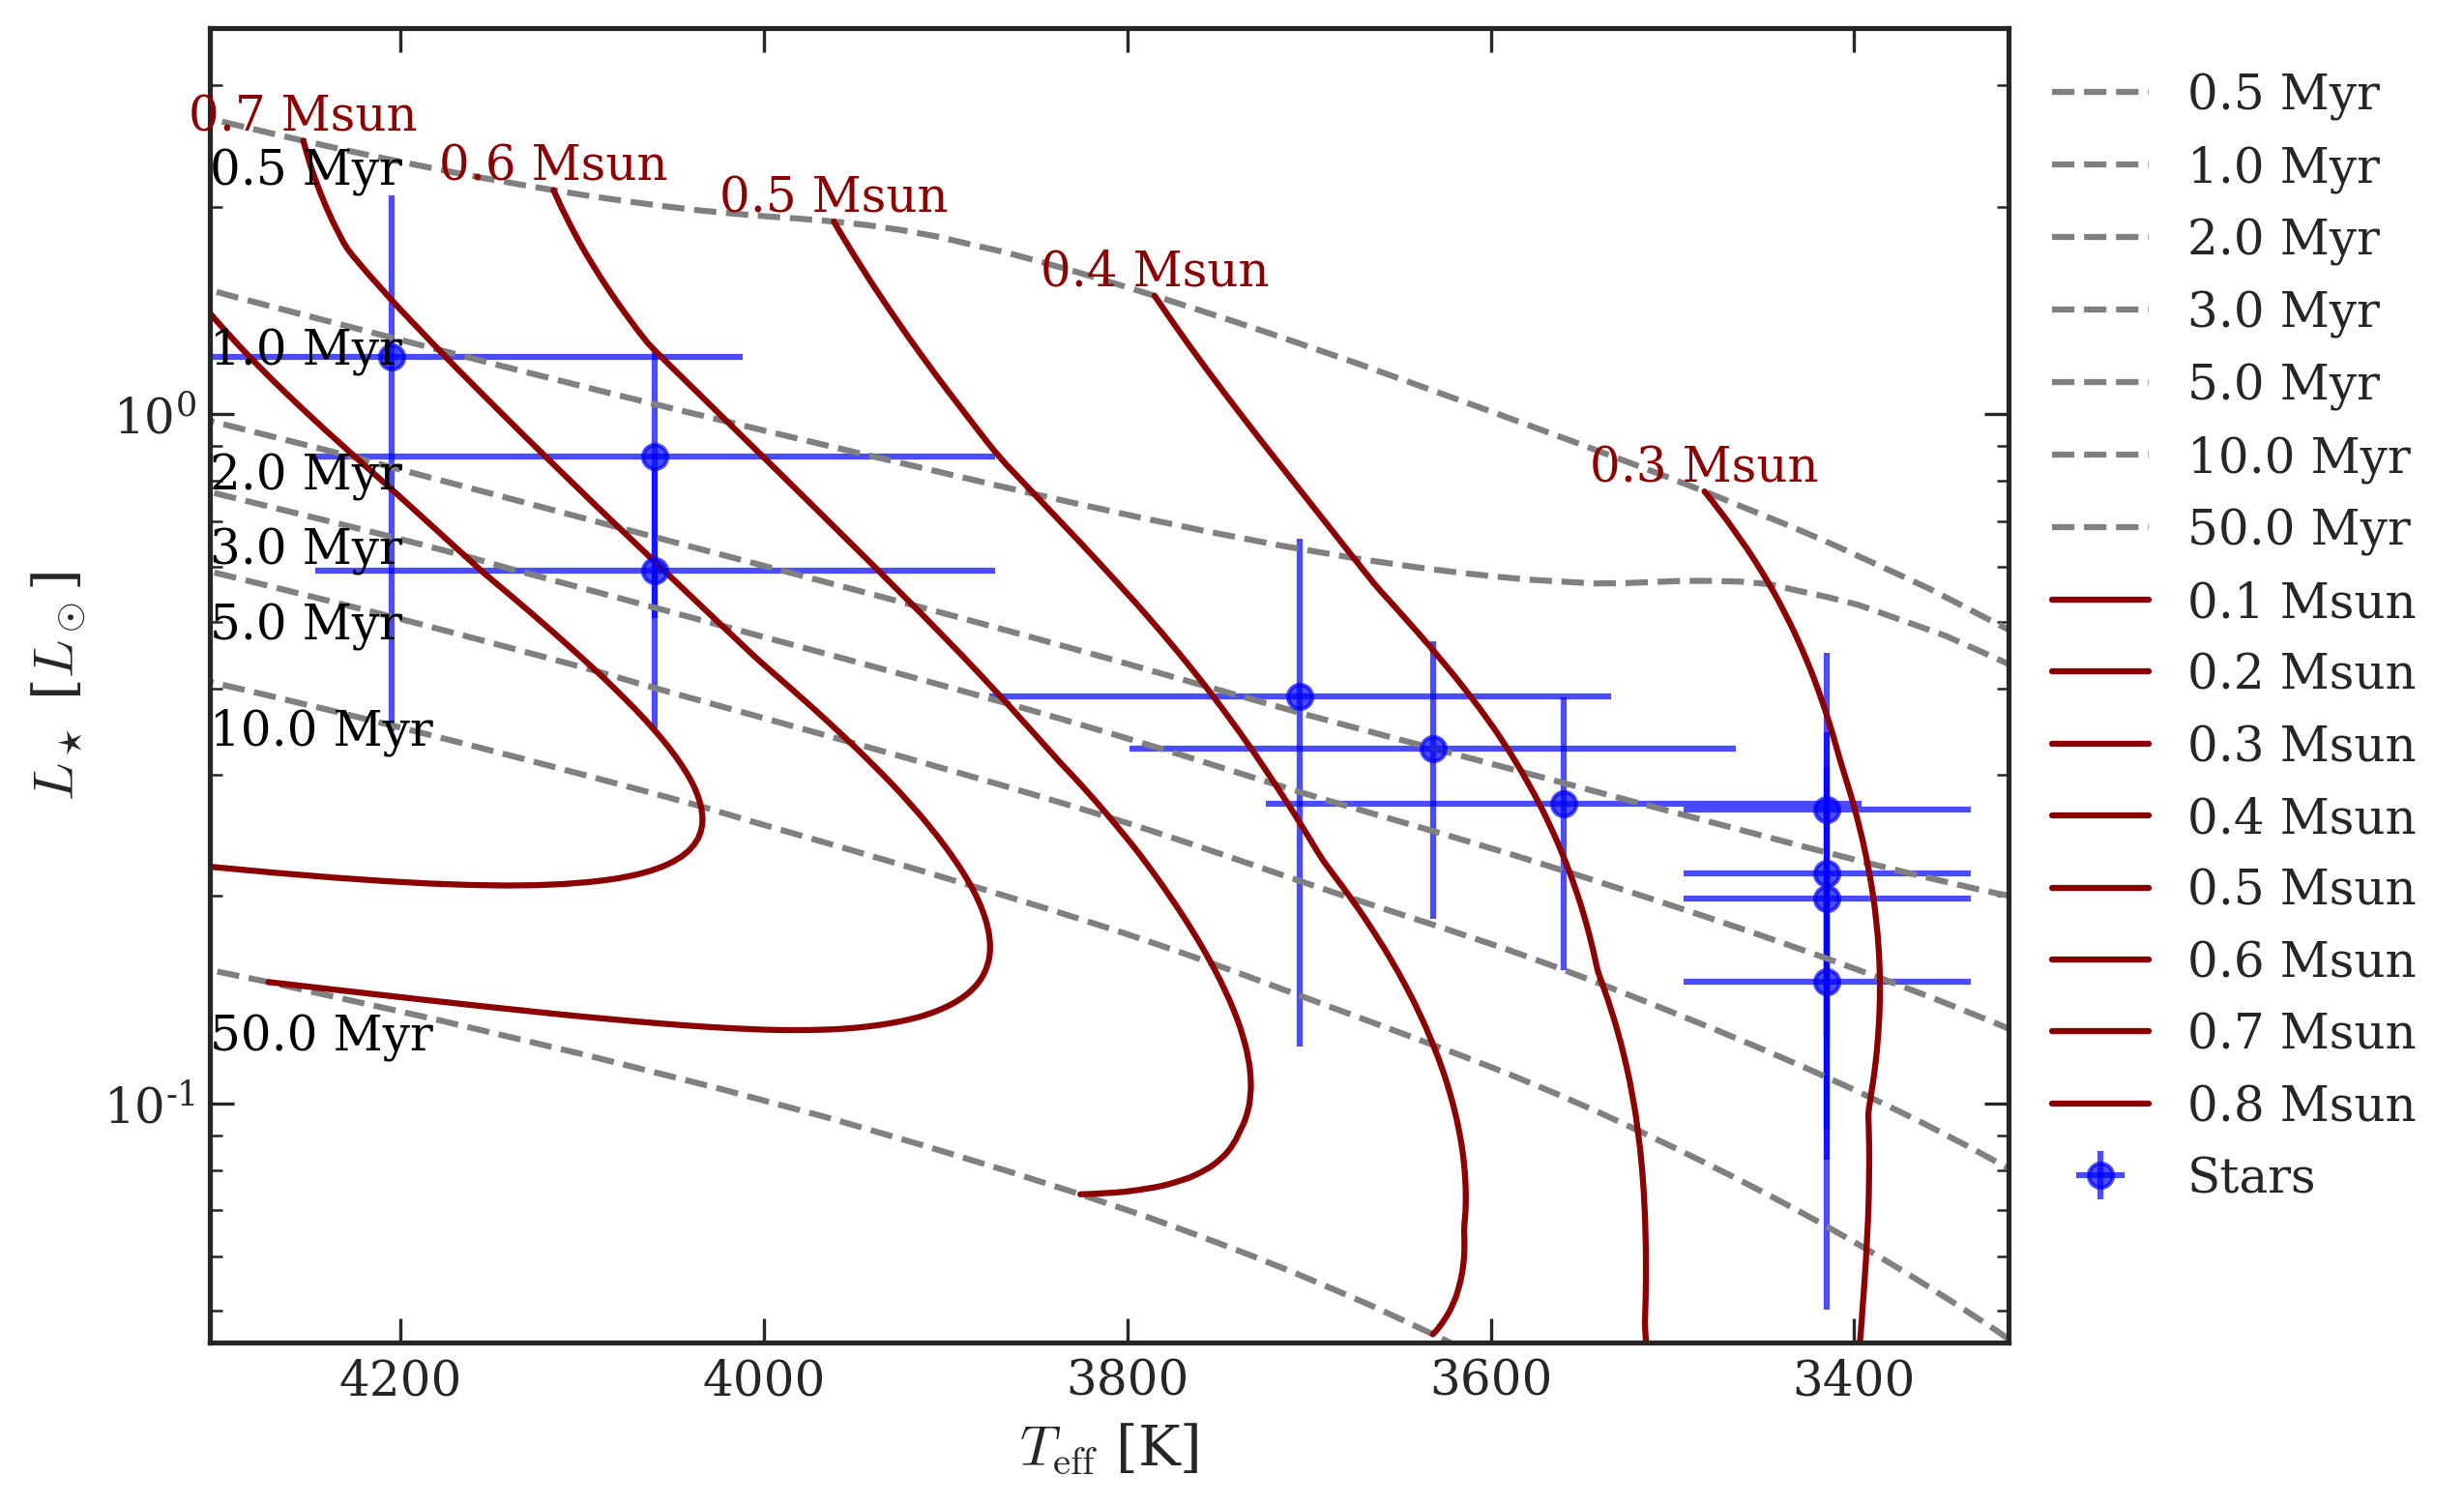

1

In [60]:
isochrone = ysoisochrone.isochrone.Isochrone()

isochrone.set_tracks('Feiden2016')

ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop)
# ysoisochrone.plotting.plot_hr_diagram(isochrone)

## For Baraffe tracks

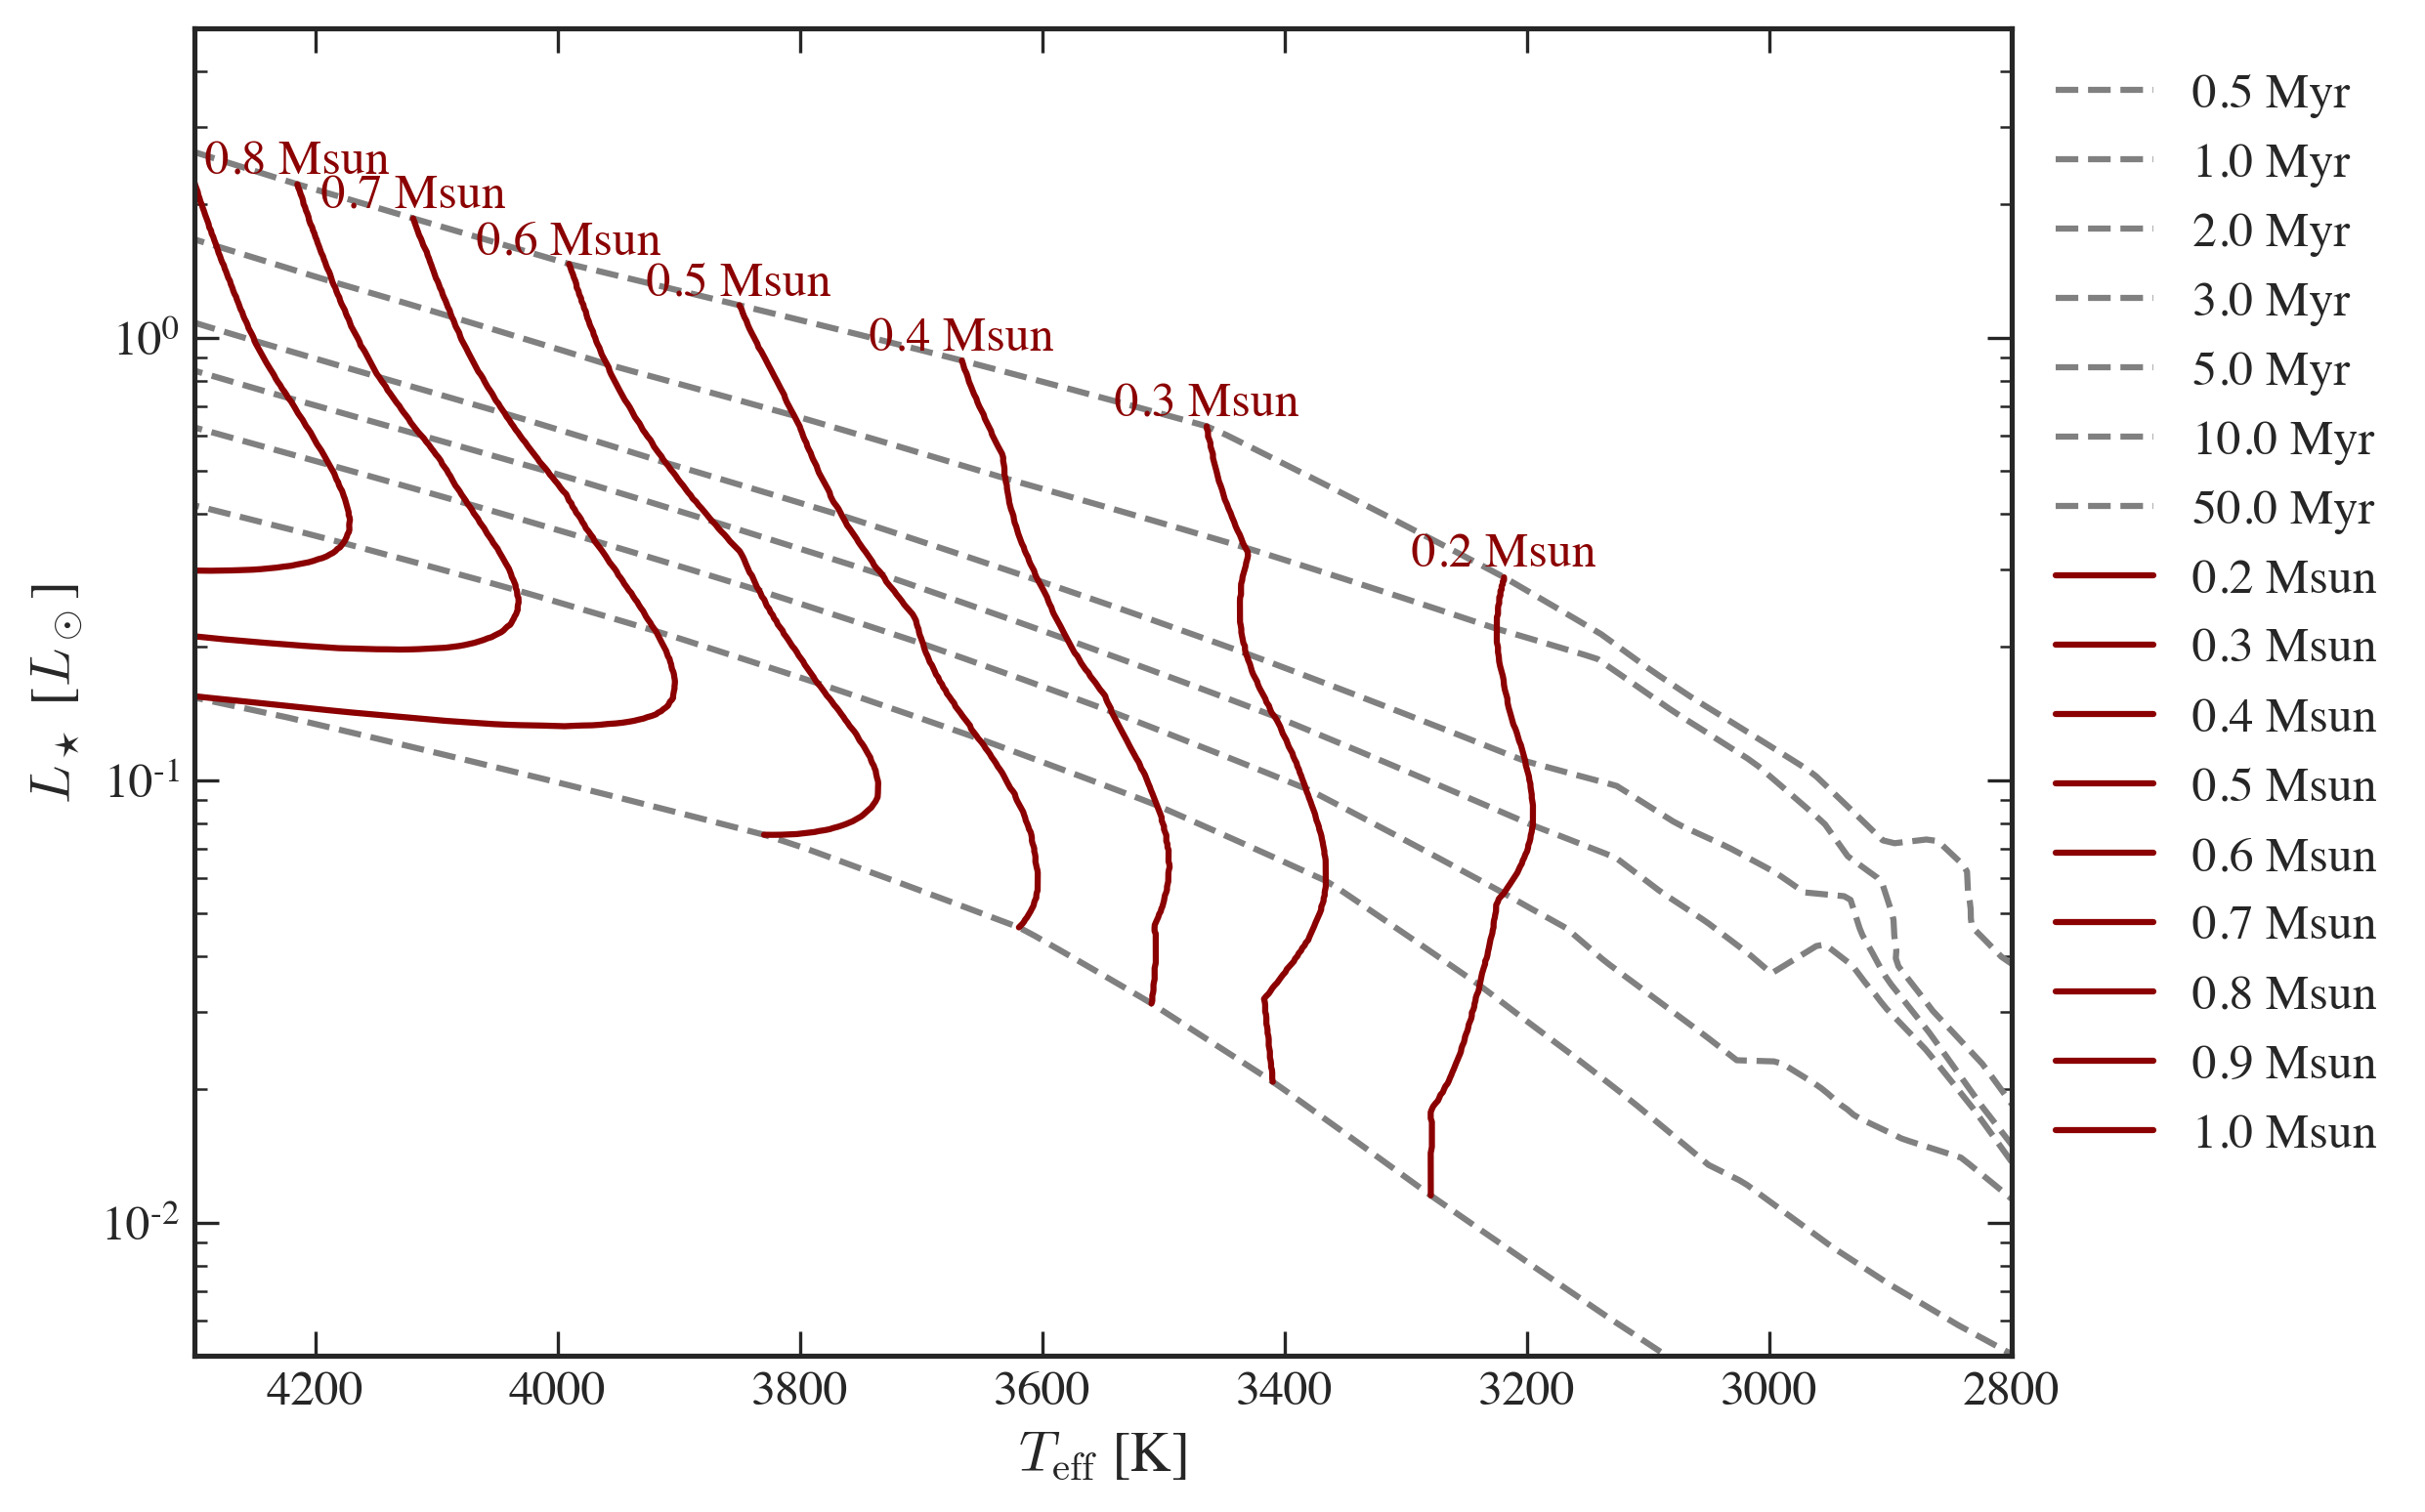

In [34]:
# Initialize the isochrone class with default data directory
isochrone = ysoisochrone.isochrone.Isochrone()

isochrone.set_tracks('Baraffe2015')

fig, ax = plt.subplots(figsize=(8, 6))

# ysoisochrone.plotting.plot_hr_diagram(isochrone, df_prop, ax_set=ax,
#                                     #   ages_to_plot=[0.50e6],
#                                       masses_to_plot=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

ysoisochrone.plotting.plot_hr_diagram(isochrone, ax_set=ax, 
                                      ages_to_plot=[0.5e6, 1.0e6, 2.0e6, 3.0e6, 5.0e6, 10.0e6, 30.0e6, 100.0e6], 
                                      masses_to_plot=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                      xlim_set=[6000, 3000], ylim_set=[0.01, 50.0])

ax.set_xlim(4300, 2800)
ax.set_ylim(0.005, 5)
plt.show()